In [1]:
import torch
import torch.optim as optim
from tqdm import tqdm, trange, tqdm_notebook
import matplotlib
import matplotlib.pyplot as plt

Loss: 0.24
tensor([[0.5000, 0.1000, 0.1500, 0.2500]], requires_grad=True)
Loss: 0.12
tensor([[0.4000, 0.2000, 0.2500, 0.3500]], requires_grad=True)
Loss: 0.05
tensor([[0.3017, 0.2670, 0.3457, 0.3447]], requires_grad=True)
Loss: 0.02
tensor([[0.2074, 0.2744, 0.4302, 0.3071]], requires_grad=True)
Loss: 0.01
tensor([[0.1202, 0.2490, 0.4931, 0.2715]], requires_grad=True)
Loss: 0.02
tensor([[0.0446, 0.2109, 0.5276, 0.2605]], requires_grad=True)
Loss: 0.03
tensor([[-0.0150,  0.1743,  0.5353,  0.2732]], requires_grad=True)
Loss: 0.04
tensor([[-0.0556,  0.1513,  0.5227,  0.2973]], requires_grad=True)
Loss: 0.04
tensor([[-0.0769,  0.1472,  0.4962,  0.3199]], requires_grad=True)
Loss: 0.04
tensor([[-0.0809,  0.1591,  0.4615,  0.3301]], requires_grad=True)
Loss: 0.03
tensor([[-0.0705,  0.1809,  0.4235,  0.3251]], requires_grad=True)
Loss: 0.02
tensor([[-0.0490,  0.2056,  0.3866,  0.3098]], requires_grad=True)
Loss: 0.02
tensor([[-0.0195,  0.2262,  0.3551,  0.2917]], requires_grad=True)
Loss: 0.01

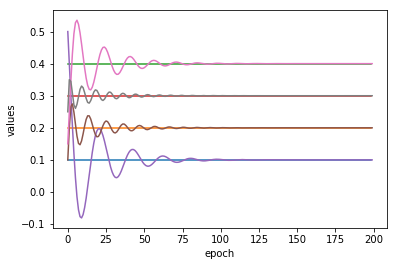

In [2]:
epoch = 200

X = torch.Tensor([[0.5,0.1,0.15,0.25]])
X.requires_grad_()
Y = torch.Tensor([[0.1,0.2,0.4,0.3]])
X_hist = torch.zeros(4,epoch)

# optimizer = optim.SGD([X], lr=0.01, momentum=0.9)
opt = optim.Adam([X], lr=0.1)
for epoch in tqdm_notebook(range(epoch)):
    X_hist[:,epoch] = X
    def closure():
        # OPTIMIZE
        opt.zero_grad()
        loss=torch.pow(Y-X, 2).sum()
        loss.backward()
        tqdm.write("Loss: {}".format(round(loss.item(),2)))
        print(X)
        return loss
    opt.step(closure)
    
Y_plot = Y.flatten().repeat(epoch,1)
X_plot = X_hist.flatten(start_dim=0, end_dim=0).transpose(0,1).detach()
plt.plot(Y_plot.numpy())    
plt.plot(X_plot.numpy())  
plt.xlabel("epoch")
plt.ylabel("values")
plt.show()